In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [107]:
np.random.seed(55)

In [108]:
n = 50
half_n = n//2

X1 = np.random.uniform(0.01, 5, half_n)
X2 = -X1  
X = np.concatenate([X1, X2])

Y1 = np.random.uniform(0.01, 5, half_n)
Y2 = -Y1  
Y = np.concatenate([Y1, Y2])

labels = np.concatenate([np.ones(half_n), -np.ones(half_n)])

indices = np.arange(n)
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
labels = labels[indices]

dataset = np.c_[X, Y]



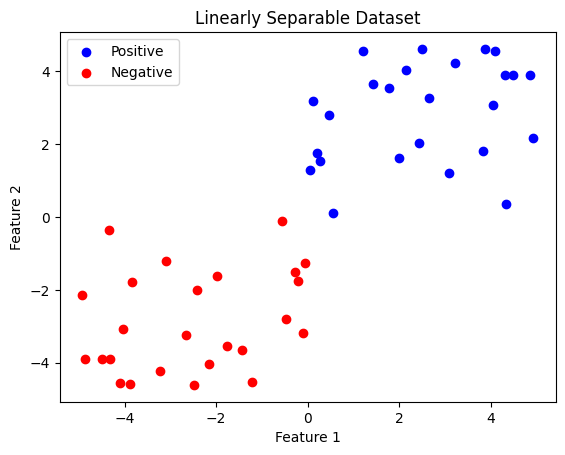

In [109]:
plt.scatter(dataset[labels == 1][:, 0], dataset[labels == 1][:, 1], color='blue', label='Positive')
plt.scatter(dataset[labels == -1][:, 0], dataset[labels == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [110]:
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.4, random_state=55)

(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((30, 2), (20, 2)), ((30,), (20,)))

### question (2)

In [111]:
#构建perceptron model
class Perceptron(object): 
    def __init__(self, x_train, y_train, x_test= None, y_test= None, lr=0.1 , epoch=5000, epsilon=1e-5):
        #初始化
        self.x=np.c_[np.ones(x_train.shape[0]),x_train]
        if x_test is not None:
           self.x_test=np.c_[np.ones(x_test.shape[0]),x_test]
           self.y_test=y_test
        self.w=np.array([0.1,0.1,0.1])
        self.y_observed=y_train
        self.lr, self.epoch, self.epsilon=lr, epoch, epsilon
    
    def class_function(self, output):
        return 2*(output>0)-1
    
    def function_x(self, x):
        output=x.dot(self.w)
        return self.class_function(output)
    
    def batch_fit(self, verbose= False, plot=False):
        train_error_list=[]
        test_error_list=[]
        for epoch in range(self.epoch):
            y_predict=self.function_x(self.x)    
            if np.any(y_predict != self.y_observed):
                self.w+=self.lr*np.sum((self.y_observed[y_predict != self.y_observed].reshape(-1,1))*(self.x)[y_predict != self.y_observed],axis=0)    
            else:
                break
            train_error=self.error(self.x,self.y_observed)
            test_error=self.error(self.x_test,self.y_test)
            train_error_list.append(train_error)
            test_error_list.append(test_error)
            if verbose:
                print("error and weight at epoch {}: {}".format(epoch+1, train_error, self.w))
        if plot:
            print("epochs {}: the weight:{} \n".format(epoch+1, self.w))
            self.plot(self.w, epoch+1)
        return self.w, train_error_list,test_error_list, epoch+1
    
    def sequential_fit(self, verbose= False, plot = False):
        train_error_list=[]
        test_error_list=[]
        weight_list=[]
        for epoch in range(self.epoch):
            initial=self.function_x(self.x)
            if np.all(initial == self.y_observed):
                break
            for i in range(len(self.x)):
                y_predict=self.function_x(self.x[i])
                if y_predict != self.y_observed[i]:
                   self.w+=self.lr*self.y_observed[i]*self.x[i]
            train_error=self.error(self.x,self.y_observed)
            test_error=self.error(self.x_test,self.y_test)
            train_error_list.append(train_error)
            test_error_list.append(test_error)
            weight_list.append(self.w.copy())
            if verbose:
                print("error and weight at epoch {}: {}".format(epoch+1, train_error, self.w))
        if plot:
            print("epochs {}: the weight:{} \n".format(epoch+1, self.w))
            self.plot(self.w, epoch+1)
        return self.w, train_error_list,test_error_list, epoch+1,weight_list
    def error(self,x=None, y=None):
        errors=0
        if x is not None:
          y_predict=self.function_x(x)
         
          if np.any(y_predict != y):
            errors=-np.sum(y[y_predict != y]*((x[y_predict != y]).dot(self.w)))
        return errors
        
    def accuracy(self):
        x=self.x_test
        y=self.y_test
        y_predict=self.function_x(x)
        accuracy=len(y[y == y_predict])/len(y)
        print('accuracy : {:.2%}'.format(accuracy))
        return accuracy

    def plot(self, w=None, epoch=0):
        x=self.x
        y=self.y_observed
        bias, a, b=w
        xx = np.linspace(-6,6,1000)
        yy = (a*xx + bias)/(-1*b)
        plt.plot(xx, yy, color='green', label='decision boundary')
        plt.xlim(np.min(x[:, 1])-1, np.max(x[:, 1])+1)
        plt.ylim(np.min(x[:, 2])-1, np.max(x[:, 2])+1)
        plt.scatter(x[y == 1][:, 1], x[y == 1][:, 2], color='blue', label='Positive')
        plt.scatter(x[y == -1][:, 1], x[y == -1][:, 2], color='red', label='Negative')
        plt.legend()
        plt.title("Linearly Separable Dataset trainded over " +str(epoch)+  " epoch")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

   

In [112]:
model=Perceptron(x_train, y_train, x_test, y_test,lr=0.0001,epoch=5000)

### Batch Training

error and weight at epoch 1: 0.03399268978892612
error and weight at epoch 2: 0.0338611990489223
error and weight at epoch 3: 0.033729708308918485
error and weight at epoch 4: 0.033598217568914665
error and weight at epoch 5: 0.03346672682891086
error and weight at epoch 6: 0.03333523608890704
error and weight at epoch 7: 0.03320374534890322
error and weight at epoch 8: 0.033072254608899405
error and weight at epoch 9: 0.032940763868895585
error and weight at epoch 10: 0.03280927312889177
error and weight at epoch 11: 0.03267778238888796
error and weight at epoch 12: 0.032546291648884146
error and weight at epoch 13: 0.032414800908880326
error and weight at epoch 14: 0.032283310168876506
error and weight at epoch 15: 0.0321518194288727
error and weight at epoch 16: 0.03202032868886888
error and weight at epoch 17: 0.031888837948865066
error and weight at epoch 18: 0.031757347208861246
error and weight at epoch 19: 0.03162585646885743
error and weight at epoch 20: 0.03149436572885361
er

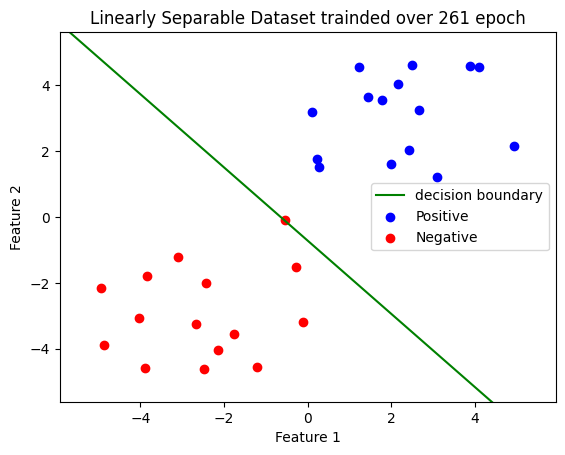

In [113]:
weight, train_error_list, test_error_list, epoch=model.batch_fit(verbose=True, plot=True)

In [114]:
epoch

261

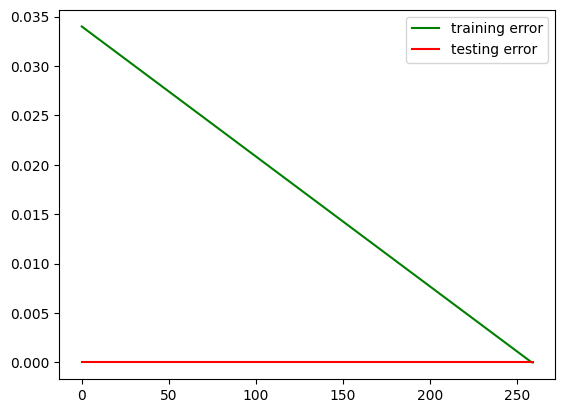

In [115]:
xxx=np.arange(len(train_error_list))
plt.plot(xxx, np.array(train_error_list), color='green', label='training error')
plt.plot(xxx, np.array(test_error_list), color='red', label='testing error')
plt.legend()
plt.show()

### 数据样本过少导致testing error curve为零

In [116]:
#accuracy calculation
model.accuracy()

accuracy : 100.00%


1.0

### sequential training

In [117]:
seq_model=Perceptron(x_train, y_train, x_test, y_test,lr=0.0001,epoch=5000)

error and weight at epoch 1: 0.03399268978892612
error and weight at epoch 2: 0.0338611990489223
error and weight at epoch 3: 0.033729708308918485
error and weight at epoch 4: 0.033598217568914665
error and weight at epoch 5: 0.03346672682891086
error and weight at epoch 6: 0.03333523608890704
error and weight at epoch 7: 0.03320374534890322
error and weight at epoch 8: 0.033072254608899405
error and weight at epoch 9: 0.032940763868895585
error and weight at epoch 10: 0.03280927312889177
error and weight at epoch 11: 0.03267778238888796
error and weight at epoch 12: 0.032546291648884146
error and weight at epoch 13: 0.032414800908880326
error and weight at epoch 14: 0.032283310168876506
error and weight at epoch 15: 0.0321518194288727
error and weight at epoch 16: 0.03202032868886888
error and weight at epoch 17: 0.031888837948865066
error and weight at epoch 18: 0.031757347208861246
error and weight at epoch 19: 0.03162585646885743
error and weight at epoch 20: 0.03149436572885361
er

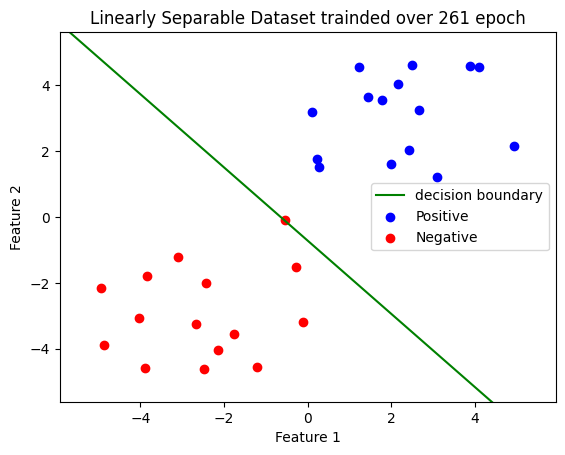

In [118]:
weight_s, train_error_list_s, test_error_list_s, epoch_s, weight_list_s=seq_model.sequential_fit(verbose=True,plot=True)

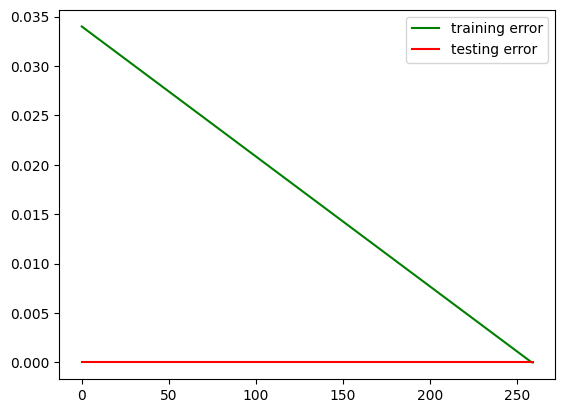

In [119]:
xxx=np.arange(len(train_error_list_s))
plt.plot(xxx, np.array(train_error_list_s), color='green', label='training error')
plt.plot(xxx, np.array(test_error_list_s), color='red', label='testing error')
plt.legend()
plt.show()

In [120]:
weight_list_s

[array([0.0999    , 0.10005507, 0.10001081]),
 array([0.0998    , 0.10011013, 0.10002162]),
 array([0.0997    , 0.1001652 , 0.10003243]),
 array([0.0996    , 0.10022026, 0.10004324]),
 array([0.0995    , 0.10027533, 0.10005405]),
 array([0.0994    , 0.10033039, 0.10006486]),
 array([0.0993    , 0.10038546, 0.10007567]),
 array([0.0992    , 0.10044052, 0.10008648]),
 array([0.0991    , 0.10049559, 0.10009729]),
 array([0.099     , 0.10055066, 0.1001081 ]),
 array([0.0989    , 0.10060572, 0.10011891]),
 array([0.0988    , 0.10066079, 0.10012972]),
 array([0.0987    , 0.10071585, 0.10014053]),
 array([0.0986    , 0.10077092, 0.10015134]),
 array([0.0985    , 0.10082598, 0.10016215]),
 array([0.0984    , 0.10088105, 0.10017296]),
 array([0.0983    , 0.10093611, 0.10018378]),
 array([0.0982    , 0.10099118, 0.10019459]),
 array([0.0981    , 0.10104624, 0.1002054 ]),
 array([0.098     , 0.10110131, 0.10021621]),
 array([0.0979    , 0.10115638, 0.10022702]),
 array([0.0978    , 0.10121144, 0.

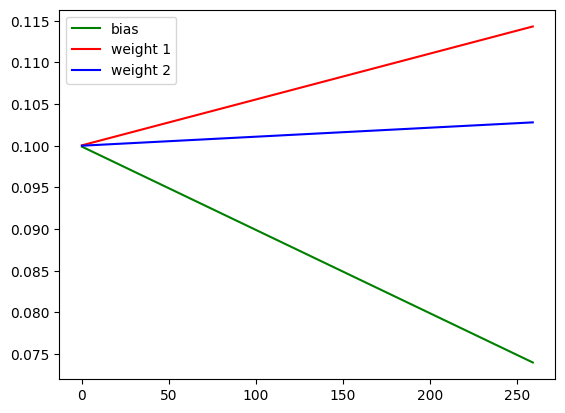

In [121]:
xxxx=np.arange(len(weight_list_s))
plt.plot(xxxx, np.array(weight_list_s)[:,0], color='green', label='bias')
plt.plot(xxxx, np.array(weight_list_s)[:,1], color='red', label='weight 1')
plt.plot(xxxx, np.array(weight_list_s)[:,2], color='blue', label='weight 2')
plt.legend()
plt.show()



In [122]:
#accuracy calculation
model.accuracy()

accuracy : 100.00%


1.0

### various learning rate

In [123]:
learning_rate=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10,100,1000,10000,100000,1000000,10000000,100000000]

In [124]:
epoch_list=[]
for lr in learning_rate:
    model_various_lr=Perceptron(x_train, y_train, x_test, y_test,lr=lr,epoch=5000)
    _, _ , _, epoch = model_various_lr.batch_fit()
    epoch_list.append(epoch)

epoch_list


[5000, 2597, 261, 27, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [125]:
epoch_list_s=[]
for lr in learning_rate:
    model_various_lr=Perceptron(x_train, y_train, x_test, y_test,lr=lr,epoch=5000)
    _, _ , _, epoch,_ = model_various_lr.sequential_fit()
    epoch_list_s.append(epoch)

epoch_list_s

[5000, 2597, 261, 27, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Text(0, 0.5, 'Training_epoch')

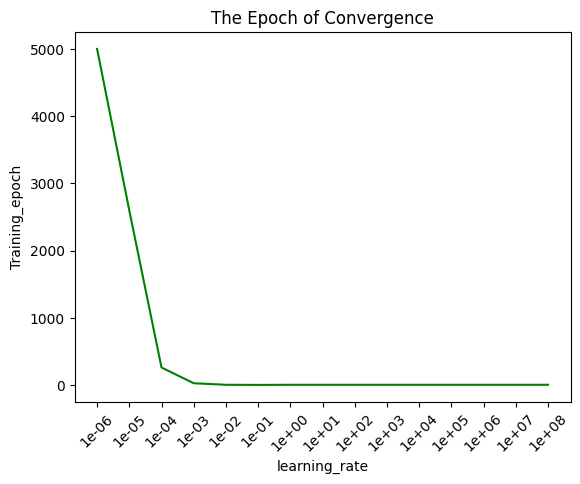

In [126]:
plt.plot(np.array(learning_rate),np.array(epoch_list),color='green')
plt.title("The Epoch of Convergence")
plt.xscale('log')  
plt.xticks(learning_rate, labels=['{:.0e}'.format(lr) for lr in learning_rate], rotation=45)
plt.xlabel("learning_rate")
plt.ylabel("Training_epoch")